![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Anh Luong
***

## Overview

This project analyses what types of films are currently performing the best at the box office. Descriptive analysis of current films provide insights to help Microsoft's new movie studio decide what type of films to create.

## Business Problem

Summary of the business problem:

1. What are the best selling genres of all time?

We will look at the best selling genres by total sales and averaged sales since released as there are movies that was released many years ago. This will tell us not only the most popular genres, but also the most profitability genres as it keeps generate sales in many years after release. The data to be looked at will be: genres, total sales and averaged sales.
 
2. What genres are highly rated with the most rating received?

By answering this question, Microsoft can chose to make a movie that is not only well received by the public but also from professional movie critics. This will potentially allow Microsoft to build up its reputation in the film industry. The data will be looked at are: genres, rating, number of votes and sales.

3. What are the best selling genres recently?

This is to find out what are the viewers' preferred genres recently. This recommendation will help Microsoft to make a film that is most likely attractive to viewers now. The data will be looked at are: Sales, Genres and Year.


## Data Understanding

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load and Understand each dataset
sales = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
titles=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
sales.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000",664300000,2010
3,Inception,WB,"292,600,000",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000",513900000,2010


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
sales.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [6]:
sales.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
titles.nunique()

tconst             146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [10]:
titles.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
ratings.nunique()

tconst           73856
averagerating       91
numvotes          7349
dtype: int64

In [14]:
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

## Data Preparation

In [15]:
#Cleaning up the sales data
#replace NAN value and convert to the right data type
sales["foreign_gross"] = sales["foreign_gross"].fillna(0)
sales['domestic_gross'] = sales['domestic_gross'].astype(float)
sales['foreign_gross'] = sales['foreign_gross'].replace(',','', regex=True).astype(float)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [16]:
# add columns to calculate average of domestic and foreign sales per year
sales['age']=[2022] - sales.loc[:,"year"]
sales['age']=sales['age'].astype(float)

sales['total sales']=sales.loc[:,"domestic_gross"] + sales.loc[:,"foreign_gross"]
sales['total sales']=sales['total sales'].astype(float)


In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
 5   age             3387 non-null   float64
 6   total sales     3359 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 185.4+ KB


In [18]:
sales.head()

,title,studio,domestic_gross,foreign_gross,year,age,total sales
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,12,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,12,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,12,"960,300,000"
3,Inception,WB,"292,600,000","535,700,000",2010,12,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,12,"752,600,000"


In [19]:
sales['avg_sales']=sales.loc[:,"total sales"]/sales.loc[:,"age"]

In [20]:
sales.head()

,title,studio,domestic_gross,foreign_gross,year,age,total sales,avg_sales
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,12,"1,067,000,000","88,916,667"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,12,"1,025,500,000","85,458,333"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,12,"960,300,000","80,025,000"
3,Inception,WB,"292,600,000","535,700,000",2010,12,"828,300,000","69,025,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,12,"752,600,000","62,716,667"


In [21]:
sales.drop(sales.iloc[:, 1:6], inplace=True, axis=1)

In [22]:
sales.head()

,title,total sales,avg_sales
0,Toy Story 3,"1,067,000,000","88,916,667"
1,Alice in Wonderland (2010),"1,025,500,000","85,458,333"
2,Harry Potter and the Deathly Hallows Part 1,"960,300,000","80,025,000"
3,Inception,"828,300,000","69,025,000"
4,Shrek Forever After,"752,600,000","62,716,667"


In [23]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3387 non-null   object 
 1   total sales  3359 non-null   float64
 2   avg_sales    3359 non-null   float64
dtypes: float64(2), object(1)
memory usage: 79.5+ KB


In [24]:
titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [25]:
#rename and drop unnessary columns
titles.drop(titles.iloc[:, 2:3], inplace=True, axis=1)
titles.rename(columns = {'tconst':'ID'}, inplace = True)
titles.rename(columns = {'primary_title':'title'}, inplace = True)
titles.rename(columns = {'start_year':'year'}, inplace = True)
titles.head()

,ID,title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy"


In [26]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               146144 non-null  object 
 1   title            146144 non-null  object 
 2   year             146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [27]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


In [28]:
#rename and drop unnessary columns
ratings.rename(columns = {'tconst':'ID'}, inplace = True)
ratings.rename(columns = {'averagerating':'avg_rating'}, inplace = True)
ratings.rename(columns = {'numvotes':'no_votes'}, inplace = True)
ratings.head()

,ID,avg_rating,no_votes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


In [29]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          73856 non-null  object 
 1   avg_rating  73856 non-null  float64
 2   no_votes    73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
ratings.describe()

,avg_rating,no_votes
count,"73,856","73,856"
mean,6,"3,524"
std,1,"30,294"
min,1,5
25%,6,14
50%,6,49
75%,7,282
max,10,"1,841,066"


In [31]:
#create a summary table that contains all neccessary information.
titles_ratings = pd.merge(titles, 
                          ratings, 
                              on=['ID'], 
                              how='left')

In [32]:
titles_ratings.head()

,ID,title,year,runtime_minutes,genres,avg_rating,no_votes
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7,77
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama",7,43
2,tt0069049,The Other Side of the Wind,2018,122,Drama,7,"4,517"
3,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6,13
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy",6,119


In [33]:
sales.head()

,title,total sales,avg_sales
0,Toy Story 3,"1,067,000,000","88,916,667"
1,Alice in Wonderland (2010),"1,025,500,000","85,458,333"
2,Harry Potter and the Deathly Hallows Part 1,"960,300,000","80,025,000"
3,Inception,"828,300,000","69,025,000"
4,Shrek Forever After,"752,600,000","62,716,667"


In [34]:
#create a summary table that contains all neccessary information.
titles_ratings_sales=pd.merge(titles_ratings, sales,
                              on=['title'], 
                              how='left')

In [35]:
#check results:
titles_ratings_sales.head()

,ID,title,year,runtime_minutes,genres,avg_rating,no_votes,total sales,avg_sales
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nan,nan
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama",7,43,nan,nan
2,tt0069049,The Other Side of the Wind,2018,122,Drama,7,"4,517",nan,nan
3,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6,13,nan,nan
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy",6,119,nan,nan


In [36]:
titles_ratings_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146146 entries, 0 to 146145
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               146146 non-null  object 
 1   title            146146 non-null  object 
 2   year             146146 non-null  int64  
 3   runtime_minutes  114407 non-null  float64
 4   genres           140738 non-null  object 
 5   avg_rating       73858 non-null   float64
 6   no_votes         73858 non-null   float64
 7   total sales      3342 non-null    float64
 8   avg_sales        3342 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 11.2+ MB


## Data Modeling and Evaluation
    

## 1. What are the best selling genres of all time?

In [37]:
#Create new dataframe: 

Genres_df=titles_ratings_sales[['genres','total sales', 'avg_sales']].copy()
Genres_df.dropna(inplace=True)
Genres_df.groupby('genres')
Genres_df.groupby(Genres_df['genres'])
Genres_df.head()

,genres,total sales,avg_sales
38,"Action,Crime,Drama","1,100,000","183,333"
48,"Adventure,Drama,Romance","8,744,000","874,400"
54,"Adventure,Comedy,Drama","188,100,000","20,900,000"
58,"Action,Crime,Drama","53,200,000","6,650,000"
60,"Action,Adventure,Sci-Fi","652,301,019","93,185,860"


In [38]:
Top_10_bytotal = Genres_df.groupby('genres').sum().sort_values(by="total sales",ascending=False).head(10)


In [39]:
Top_10_bytotal

,total sales,avg_sales
genres,,
"Action,Adventure,Sci-Fi","27,636,102,388","4,079,057,082"
"Adventure,Animation,Comedy","27,607,332,597","3,879,035,962"
"Action,Adventure,Fantasy","13,314,887,000","2,318,437,551"
Drama,"9,705,685,196","1,278,078,355"
"Action,Adventure,Comedy","9,666,672,299","1,753,394,320"
Documentary,"6,670,552,396","918,880,416"
"Action,Adventure,Thriller","6,600,098,000","899,998,869"
"Action,Adventure,Animation","6,454,160,400","899,124,031"
Comedy,"5,513,496,099","752,689,767"


Text(0.5, 0, 'billions')

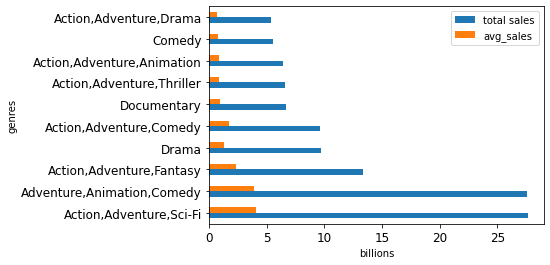

In [40]:
import matplotlib.ticker as ticker
ax=Top_10_bytotal.plot(kind="barh", fontsize=12)
current_values = plt.gca().get_xticks()

scale_x = 1e9
ticks_x = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_x))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_xlabel('billions')

Recommendation 1: 

    The top 2 best selling genres based on both total and averaged sales are 
        1 - Action, Adventure and Scifi
        2 - Action, Animation and Comedy
        
   It is worth noting that Action and Adventure genres appear in all 6 out 10 genres. It is recommended that a film with a mix genre of at least Action and Adventure will most likely to be performing well in the box office. 

# 2. What genres are highly rated with the most rating received?

In [41]:
#create new dataframe: 

AvgRatings_df= titles_ratings_sales[['genres','avg_rating']].copy()
AvgRatings_df.dropna(inplace=True)
AvgRatings_df_2=AvgRatings_df.groupby('genres').mean().sort_values(by="avg_rating",ascending=False)
AvgRatings_df_2.head()

,avg_rating
genres,
"Comedy,Documentary,Fantasy",9
"Documentary,Family,Musical",9
"History,Sport",9
"Music,Mystery",9
Game-Show,9


In [42]:
Votes_df= titles_ratings_sales[['genres', 'no_votes']].copy()
Votes_df.dropna(inplace=True)
Votes_df_2=Votes_df.groupby('genres').sum().sort_values(by="no_votes",ascending=False)
Votes_df_2.head(10)

,no_votes
genres,
"Action,Adventure,Sci-Fi","23,023,248"
"Action,Adventure,Fantasy","9,658,883"
"Adventure,Animation,Comedy","8,687,435"
Drama,"8,395,521"
"Comedy,Drama,Romance","7,665,463"
"Action,Adventure,Comedy","7,256,686"
Comedy,"6,832,037"
"Comedy,Drama","6,462,839"
"Action,Crime,Drama","5,563,553"


In [43]:
#create a dataframe for top 10 genres that are highly rated with the most rating received:
genres_ratings=pd.merge(AvgRatings_df_2, Votes_df_2,
                              on=['genres'], 
                              how='left')
genres_ratings.describe()

,avg_rating,no_votes
count,923,923
mean,6,"281,934"
std,1,"1,191,639"
min,1,5
25%,6,166
50%,6,"2,389"
75%,7,"51,818"
max,9,"23,023,248"


In [44]:
#see what genres receives the most number votes and what are the rating
genres_ratings.sort_values(by="no_votes",ascending=False).head(10)

,avg_rating,no_votes
genres,,
"Action,Adventure,Sci-Fi",6,"23,023,248"
"Action,Adventure,Fantasy",5,"9,658,883"
"Adventure,Animation,Comedy",6,"8,687,435"
Drama,6,"8,395,521"
"Comedy,Drama,Romance",6,"7,665,463"
"Action,Adventure,Comedy",6,"7,256,686"
Comedy,6,"6,832,037"
"Comedy,Drama",6,"6,462,839"
"Action,Crime,Drama",6,"5,563,553"


The table shows that even though the top ten genres receives the most votes, but do not recessarily receive the highest rating. The rating is average. None of the top 10 most voted genres receive a rating of 7 which is considered above average.

In [45]:
#now we want to sort out genres that receives at least 1 million votes with a rating of at least 6.5. 
votes_over_1mil = genres_ratings[genres_ratings['no_votes']> 1000000]
highly_rated=votes_over_1mil[votes_over_1mil['avg_rating']>= 6.5]
highly_rated.sort_values(by="no_votes",ascending=False).head(10)

,avg_rating,no_votes
genres,,
"Action,Adventure,Animation",7,"3,570,543"
"Biography,Drama,History",7,"3,502,843"
"Biography,Drama",7,"2,694,678"
"Biography,Crime,Drama",7,"2,491,084"
"Biography,Comedy,Drama",7,"2,418,463"
"Biography,Drama,Thriller",7,"1,859,152"
Documentary,7,"1,785,513"
"Action,Biography,Drama",7,"1,510,436"
"Biography,Drama,Sport",7,"1,432,227"


The above shows that Action, Adventure and Animation receives the most critiics reviews, suggesting that it is quite popular among the film critics. 

Now, we would like to find out if the highly rated genres by critics are also doing well in terms of sales: 

In [46]:
#create new data frame

highly_rated_sales = pd.merge( highly_rated,Genres_df,
                              on=['genres'], 
                              how='left')
highly_rated_sales.drop(highly_rated_sales.iloc[:, 1:3], inplace=True, axis=1)
highly_rated_sales.groupby('genres').sum().sort_values(by="total sales",ascending=False).head(10)
highly_rated_sales2=highly_rated_sales.groupby('genres').sum().sort_values(by="total sales",ascending=False).head(10)

In [47]:
highly_rated_sales2

,total sales,avg_sales
genres,,
Documentary,"6,670,552,396","918,880,416"
"Action,Adventure,Animation","6,454,160,400","899,124,031"
"Biography,Drama,History","2,520,359,399","379,434,181"
"Biography,Drama","1,334,131,099","187,036,867"
"Action,Biography,Drama","1,256,488,900","174,417,353"
"Biography,Comedy,Drama","1,125,083,600","202,817,471"
"Action,Drama,History","944,747,300","182,873,550"
"Biography,Crime,Drama","912,358,200","129,128,717"
"Biography,Drama,Thriller","806,888,000","101,284,439"


Text(0.5, 0, 'billions')

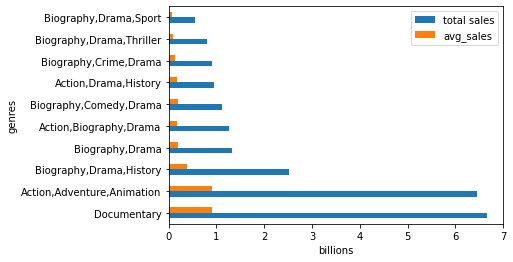

In [48]:
import matplotlib.ticker as ticker
graph2 = highly_rated_sales2.plot.barh()
current_values = plt.gca().get_xticks()

scale_x = 1e9
ticks_x = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_x))
graph2.xaxis.set_major_formatter(ticks_x)
graph2.set_xlabel('billions')

Action, Adventure and Animation is still performing well in term of sales. Whilst Documentory did not receive as much traction with the film critics, it is still highly rated and generate the most sales out of the top 10 highly rated genres. Biography and Drama appear in 7 out the top 10 highly rated genres. 

# What are the best selling genres recently?

In [49]:
# best selling or rating by year (grouped)
titles_ratings_sales.head()

,ID,title,year,runtime_minutes,genres,avg_rating,no_votes,total sales,avg_sales
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nan,nan
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama",7,43,nan,nan
2,tt0069049,The Other Side of the Wind,2018,122,Drama,7,"4,517",nan,nan
3,tt0069204,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6,13,nan,nan
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy",6,119,nan,nan


In [50]:
#create new dataframe for analysis:
sales_by_year = titles_ratings_sales[['year','genres','total sales']].copy()
sales_by_year.dropna(inplace=True)
sales_by_year.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302 entries, 38 to 146080
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         3302 non-null   int64  
 1   genres       3302 non-null   object 
 2   total sales  3302 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.2+ KB


In [51]:
sales_by_year

,year,genres,total sales
38,2016,"Action,Crime,Drama","1,100,000"
48,2012,"Adventure,Drama,Romance","8,744,000"
54,2013,"Adventure,Comedy,Drama","188,100,000"
58,2014,"Action,Crime,Drama","53,200,000"
60,2015,"Action,Adventure,Sci-Fi","652,301,019"
...,...,...,...
145431,2019,Drama,"14,900,000"
145505,2018,Drama,"22,800"
145666,2019,"Action,Drama","105,000,000"
145702,2019,Crime,"613,000"


In [52]:
sales_by_year2=sales_by_year.groupby(['year', 'genres']).sum().reset_index()
sales_by_year2

,year,genres,total sales
0,2010,Action,"26,417,500"
1,2010,"Action,Adventure,Animation","635,000,000"
2,2010,"Action,Adventure,Crime","30,757,000"
3,2010,"Action,Adventure,Drama","503,492,600"
4,2010,"Action,Adventure,Family","535,000,000"
...,...,...,...
1155,2019,History,"34,700,000"
1156,2019,Horror,"113,200,000"
1157,2019,"Horror,Thriller","343,000"
1158,2019,Thriller,"60,917,500"


In [53]:
sales_by_year2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1160 non-null   int64  
 1   genres       1160 non-null   object 
 2   total sales  1160 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.3+ KB


In [54]:
sales_by_year3=sales_by_year2.sort_values(by="total sales",ascending=False).groupby('year').head(1).sort_values(by="year",ascending=False)
sales_by_year3

,year,genres,total sales
1159,2020,Drama,"76,900"
1135,2019,Action,"306,700,000"
1048,2018,"Action,Adventure,Sci-Fi","4,386,201,370"
920,2017,"Action,Adventure,Fantasy","4,513,100,000"
825,2016,"Adventure,Animation,Comedy","4,780,699,999"
664,2015,"Action,Adventure,Sci-Fi","3,366,401,019"
526,2014,"Action,Adventure,Sci-Fi","4,030,400,000"
397,2013,"Action,Adventure,Sci-Fi","4,803,500,000"
302,2012,"Adventure,Animation,Comedy","2,881,170,200"
171,2011,"Adventure,Animation,Comedy","2,737,471,700"


In [55]:
sales_by_year4=sales_by_year3.groupby('genres').agg({'total sales': ['sum', 'count']}).reset_index()
sales_by_year4

genres    total sales      
                                         sum count
0                      Action    306,700,000     1
1    Action,Adventure,Fantasy  4,513,100,000     1
2     Action,Adventure,Sci-Fi 16,586,502,389     4
3  Adventure,Animation,Comedy 13,062,741,899     4
4                       Drama         76,900     1

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Action,Adventure,Fantasy'),
  Text(2, 0, 'Action,Adventure,Sci-Fi'),
  Text(3, 0, 'Adventure,Animation,Comedy'),
  Text(4, 0, 'Drama')])

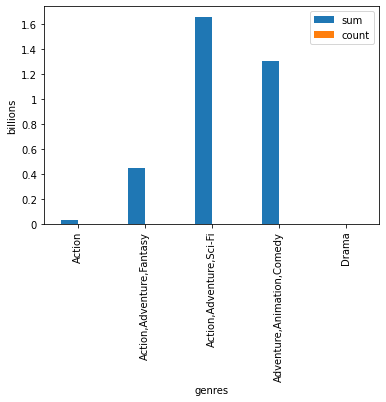

In [56]:
graph3= sales_by_year4.plot.bar(x='genres', y='total sales')
scale_y = 1e10
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
graph3.yaxis.set_major_formatter(ticks_y)
graph3.set_ylabel('billions')
plt.xticks(rotation=90)

'Action,Adventure,Sci-Fiz' and 'Adventure,Animation,Comedy' are most popular genres which generated $16 and $13 billions in sales revnue respectively in the last 10 years. 

2019 and 2020 best selling genres appear to be Action and Drama respectively. However, the sales revenue is much lower compared to the previous year. Viewers film preferences may have changed in the last two year or the data may be incomplete. 

## Limitation

It is worth noting that sales data is a lot smaller compared to rating data i.e. Sales dataset contains ~3300 movies whilst the rating dataset has more than 70,00 movies. The above data analysis is mainly based on sales, therefore, further data collection is highly recommended to further understand the trend. 

The analysis has also not considered the cost to make different type of genres which plays a major role in terms of profit.

## Conclusions

Despite of the limitation stated above, the recommendations are:

From a sales perspective, the top 2 best selling genres based on both total and averaged sales are 
    1 - Action, Adventure and Scifi
    2 - Action, Animation and Comedy
    
It is worth noting that Action and Adventure genres appear in all 7 out of Top 10 selling genres of all time. It is recommended that a film with a mix genre of at least Action and Adventure will most likely to be performing well in the box office.

In terms of ratings, 'Action, Adventure and Animation' performs well the most among the highly rated movies. Whilst Documentory did not receive as much traction from the film critics, it is still highly rated and generate the most sales out of the top 10 highly rated genres. Biography and Drama appear in 7 out the top 10 highly rated genres with a good sales performance.

Lastly, 'Action,Adventure,Sci-Fi' and 'Adventure,Animation,Comedy' are most popular genres which generated $16 and $13 billions in sales revnue respectively in the last 10 years. 

Next step, the business should look to obtain a larger dataset for sales, especially for 2019 and 2020 datasets and ensure that the datasets are up to date and complete. Furthermore, cost should also be a key factor for consideration as it can be more costly to create film in Action, Animiation or Scifi genres than Drama or Documentary. It may be more profitable make Drama or Documentary if they can generate a good volumn of sales, which may not be as much as Action, Animation or Scifi.